In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

from keplergl import KeplerGl

#Functions
from src.funk import Funk 

In [2]:
#I will deal only with Comunidad de Madrid to save resources. 
# If needed, the whole set or another subset can be used, the polygons are there. 

#spain=gpd.read_file('polygons/georef-spain-municipio@public.geojson')   # cargar datos geoespaciales (multipolygon)
#RangeIndex: 8223 entries, 0 to 8222 ; Data columns (total 12 columns) ; memory usage: 6.8 MB

#madri = spain[spain['prov_name'] == 'Madrid']
# Int64Index: 181 entries, 176 to 8027 ; Data columns (total 12 columns) ; memory usage: 151.5 KB

#Only Comunidad de Madrid saved.
#madri.to_file('polygons/Comunidad_de_Madrid.geojson', driver='GeoJSON')

In [3]:
#This file contains the polygons for Comunidad de Madrid, for each Municipio.
#This file does not have municipal codes, only zipcodes. Also, the name of the Municipios does not exactly match the base table.

#I can see two possible paths. 
# Either assign zipcodes to every municipio on the base table, but some municipios have several zipcodes. 
#  Only Alaclá de Henares has 7 different zipcodes
#   mun_code is not zipcode, it is its code in the Agencia Tributaria
#    Mun_id in foreign_born is the code for Institudo de Estadística
#     Most likely one is the code for Comunidad de Madrid and the other one is in Spain
# Or clean their names in order to match the base table.
#  This will be the way.

madrid = gpd.read_file('polygons/Comunidad_de_Madrid.geojson')   # cargar datos geoespaciales (multipolygon)
#RangeIndex: 181 entries, 0 to 180 ; Data columns (total 12 columns): memory usage: 17.1+ KB

madrid.drop(madrid.columns[[1, 2, 3, 4, 5, 8, 9, 10]], axis=1, inplace=True)
#Los Baldios and El Redegüelo are not actual municipios, but territories in Cercedilla and Morarzarzal
madrid.drop(madrid[(madrid.mun_name == 'Los Baldios')].index, axis=0, inplace=True)
madrid.drop(madrid[(madrid.mun_name == 'El Redegüelo')].index, axis=0, inplace=True)


,geo_point_2d,mun_code,mun_name,geometry
0,"{'lon': -3.4801385596854346, 'lat': 40.5239757...",28002,Ajalvir,"POLYGON ((-3.51222 40.53864, -3.51151 40.53759..."
96,"{'lon': -3.8500020800172634, 'lat': 40.9203835...",28003,Alameda del Valle,"POLYGON ((-3.89864 40.95883, -3.89742 40.95681..."
1,"{'lon': -3.3696004109155107, 'lat': 40.4945916...",28005,Alcalá de Henares,"POLYGON ((-3.44720 40.44631, -3.44669 40.44589..."
145,"{'lon': -3.6301211453858566, 'lat': 40.5345949...",28006,Alcobendas,"POLYGON ((-3.67414 40.58886, -3.67600 40.58795..."
124,"{'lon': -3.8372316857739786, 'lat': 40.3583939...",28007,Alcorcón,"POLYGON ((-3.87092 40.35312, -3.86762 40.35364..."


In [ ]:
madrid.loc[madrid.mun_name == 'El Álamo'].replace('El Alamo')

In [41]:
for i in madrid.mun_name: 
    if i.startswith('El '): 
        madrid.mun_name = madrid.mun_name.replace(i,i[3:] + ' (El)') 
    elif i.startswith('La '): 
        madrid.mun_name = madrid.mun_name.replace(i,i[3:] + ' (La)') 
    elif i.startswith('Las '): 
        madrid.mun_name = madrid.mun_name.replace(i,i[4:] + ' (Las)')
    elif i.startswith('Los '): 
        madrid.mun_name = madrid.mun_name.replace(i,i[4:] + ' (Los)')



madrid = madrid.sort_values('mun_name')
madrid.head()


,geo_point_2d,mun_code,mun_name,geometry
123,"{'lon': -3.6357100678630663, 'lat': 41.0931461...",28001,Acebeda (La),"POLYGON ((-3.67606 41.08670, -3.67457 41.08504..."
0,"{'lon': -3.4801385596854346, 'lat': 40.5239757...",28002,Ajalvir,"POLYGON ((-3.51222 40.53864, -3.51151 40.53759..."
96,"{'lon': -3.8500020800172634, 'lat': 40.9203835...",28003,Alameda del Valle,"POLYGON ((-3.89864 40.95883, -3.89742 40.95681..."
1,"{'lon': -3.3696004109155107, 'lat': 40.4945916...",28005,Alcalá de Henares,"POLYGON ((-3.44720 40.44631, -3.44669 40.44589..."
145,"{'lon': -3.6301211453858566, 'lat': 40.5345949...",28006,Alcobendas,"POLYGON ((-3.67414 40.58886, -3.67600 40.58795..."
124,"{'lon': -3.8372316857739786, 'lat': 40.3583939...",28007,Alcorcón,"POLYGON ((-3.87092 40.35312, -3.86762 40.35364..."
97,"{'lon': -4.223784484727634, 'lat': 40.30925623...",28008,Aldea del Fresno,"POLYGON ((-4.29503 40.32262, -4.29404 40.31998..."
76,"{'lon': -3.52992735290857, 'lat': 40.608218222...",28009,Algete,"POLYGON ((-3.59368 40.65480, -3.59311 40.65360..."
28,"{'lon': -4.020814002152194, 'lat': 40.66184193...",28010,Alpedrete,"POLYGON ((-4.04506 40.66253, -4.04716 40.66033..."
77,"{'lon': -3.176683783747184, 'lat': 40.34077420...",28011,Ambite,"POLYGON ((-3.21627 40.31288, -3.21202 40.31033..."


In [61]:
f_b = pd.read_csv('clean_data/Foreign_born.csv')
#Columns: 212 entries, Mun_id to _merge ; dtypes: float64(1), int64(209), object(2) ; memory usage: 298.2+ KB
#There are only 179 minucipios in Comunidad de Madrid, what are the other 33 entries?


In [5]:
mapa_k = KeplerGl(height=600, width=800)   # inicia el mapa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [6]:
mapa_k.add_data(madrid.copy(), 'Madrí')    # se añaden datos y se pone nombre

In [7]:
#mapa_k

In [12]:
'''naci_fue.drop([8,9], axis=0, inplace=True) #Countries row out
naci_fue.reset_index(drop=True, inplace=True) #Reset index

naci_fue.fillna(0, inplace=True) #Nan to 0 people`'''

'naci_fue.drop([8,9], axis=0, inplace=True) #Countries row out\nnaci_fue.reset_index(drop=True, inplace=True) #Reset index\n\nnaci_fue.fillna(0, inplace=True) #Nan to 0 people`'

'N nan cols: 0'

Series([], dtype: float64)

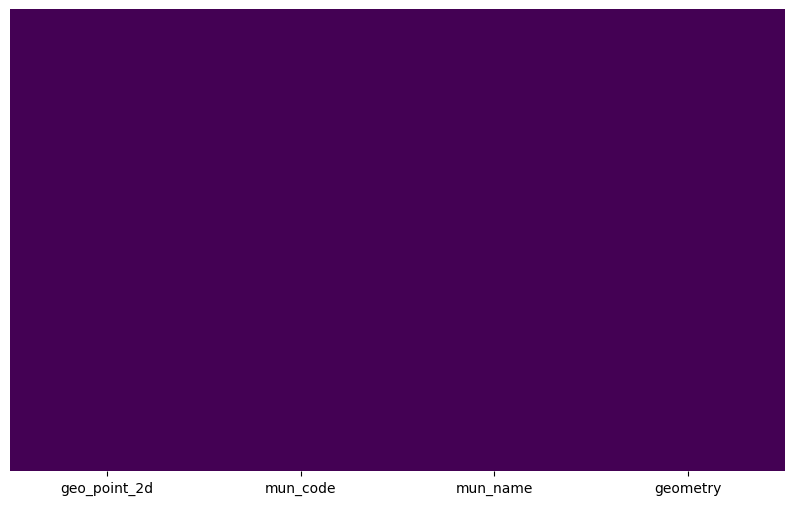

In [13]:

Funk.check_nan(madrid)

In [14]:
#Cleaning excel table into dataframe
'''
pob_total.drop([0,1,2,3,4,5,6,7], axis=0, inplace=True) #Excel headers out
pob_total = pob_total.rename(columns=pob_total.iloc[0]) #Assign column headers
pob_total.columns.values[0] = 'Mun_id'
pob_total.columns.values[1] = 'Municipio'
pob_total.columns.values[2] = 'Poblacion_total'
pob_total.drop([8,9], axis=0, inplace=True) #Countries row out
pob_total.reset_index(drop=True, inplace=True) #Reset index

pob_total.fillna(0, inplace=True) #Nan to 0 people

pob_total.head()'''

"\npob_total.drop([0,1,2,3,4,5,6,7], axis=0, inplace=True) #Excel headers out\npob_total = pob_total.rename(columns=pob_total.iloc[0]) #Assign column headers\npob_total.columns.values[0] = 'Mun_id'\npob_total.columns.values[1] = 'Municipio'\npob_total.columns.values[2] = 'Poblacion_total'\npob_total.drop([8,9], axis=0, inplace=True) #Countries row out\npob_total.reset_index(drop=True, inplace=True) #Reset index\n\npob_total.fillna(0, inplace=True) #Nan to 0 people\n\npob_total.head()"

In [15]:
#Merging both dataframes

'''naci_fue.drop(['Municipio'], axis=1, inplace=True)
tab_base = pob_total.merge(naci_fue, on='Mun_id', how='left', indicator=True)
col = tab_base.pop('Nacimiento_extranjero')
tab_base.insert(3, col.name, col)'''

"naci_fue.drop(['Municipio'], axis=1, inplace=True)\ntab_base = pob_total.merge(naci_fue, on='Mun_id', how='left', indicator=True)\ncol = tab_base.pop('Nacimiento_extranjero')\ntab_base.insert(3, col.name, col)"

In [16]:
#Calculating foreign-born percentage 

'''tab_base['Porcentaje_pob_ext'] = (tab_base['Nacimiento_extranjero'] / tab_base['Poblacion_total']) * 100
col = tab_base.pop('Porcentaje_pob_ext')
tab_base.insert(3, col.name, col)
tab_base.head()'''

"tab_base['Porcentaje_pob_ext'] = (tab_base['Nacimiento_extranjero'] / tab_base['Poblacion_total']) * 100\ncol = tab_base.pop('Porcentaje_pob_ext')\ntab_base.insert(3, col.name, col)\ntab_base.head()"

In [17]:
#Clean data served
#tab_base.to_csv('clean_data/Foreign_born.csv', index=False)